In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

Cargamos los datos con pandas

In [2]:
df_fraude = pd.read_csv('fraud_test.csv', sep=",")

In [3]:
df_fraude.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
rows, columns = df_fraude.shape
print("los números de filas en el dataset son:", rows)
print("los numeros de columnas en el dataset son:", columns)

los números de filas en el dataset son: 555719
los numeros de columnas en el dataset son: 23


In [5]:
# Para facilitar nuestro dataset, se renombran las columnnas de ingles a español.
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombramos las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostramos los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


In [6]:
df_fraude.describe()

,Unnamed: 0,num_tarjeta,monto,codigo_postal,latitud,longitud,poblacion_ciudad,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            555719 non-null  int64  
 1   fecha_transaccion     555719 non-null  object 
 2   num_tarjeta           555719 non-null  float64
 3   comerciante           555719 non-null  object 
 4   categoria             555719 non-null  object 
 5   monto                 555719 non-null  float64
 6   nombre                555719 non-null  object 
 7   apellido              555719 non-null  object 
 8   genero                555719 non-null  object 
 9   calle                 555719 non-null  object 
 10  ciudad                555719 non-null  object 
 11  estado                555719 non-null  object 
 12  codigo_postal         555719 non-null  int64  
 13  latitud               555719 non-null  float64
 14  longitud              555719 non-null  float64
 15  

## 1. Preparación de los datos.

Selección de Características
Seleccionaremos las características que son más indicativas de fraude. Dado el dataset df_fraude, estas pueden incluir:

Monto de la transacción: monto
Ubicación geográfica: latitud, longitud, latitud_comerciante, longitud_comerciante
Tiempo de la transacción: tiempo_unix
Variables categóricas: categoria, genero, ciudad, estado, trabajo

Aplicación de K-Means
1. Explorar Diferentes Valores de k usando el Método del Codo
El objetivo aquí es identificar el número óptimo de clusters (k) mediante el método del codo, que nos ayuda a encontrar un balance entre la cantidad de clusters y la inercia (within-cluster sum of squares, WCSS).

In [12]:
# Selección y normalización de características numéricas
numerical_cols = ["monto", "latitud", "longitud", "poblacion_ciudad", 
                  "tiempo_unix", "latitud_comerciante", "longitud_comerciante"]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(df_fraude[numerical_cols])

In [13]:
# Codificación de variables categóricas
categorical_cols = ["categoria", "genero", "ciudad", "estado", "trabajo"]
X_categorical = pd.get_dummies(df_fraude[categorical_cols], drop_first=True)

In [14]:
# Combinar las características normalizadas y las categóricas codificadas
X_prepared = np.hstack([X_numeric_scaled, X_categorical.values])

In [15]:
# Muestreo aleatorio de 50000 registros (ajustar según disponibilidad de memoria)
sampled_df = df_fraude.sample(n=50000, random_state=0)

In [16]:
# Repetir los pasos de preparación con el subset
X_numeric_scaled_sampled = scaler.fit_transform(sampled_df[numerical_cols])
X_categorical_sampled = pd.get_dummies(sampled_df[categorical_cols], drop_first=True)
X_prepared_sampled = np.hstack([X_numeric_scaled_sampled, X_categorical_sampled.values])


In [17]:
# Aplicar el algoritmo K-Means 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_prepared_sampled)
    wcss.append(kmeans.inertia_)

Gráfico del método del codo

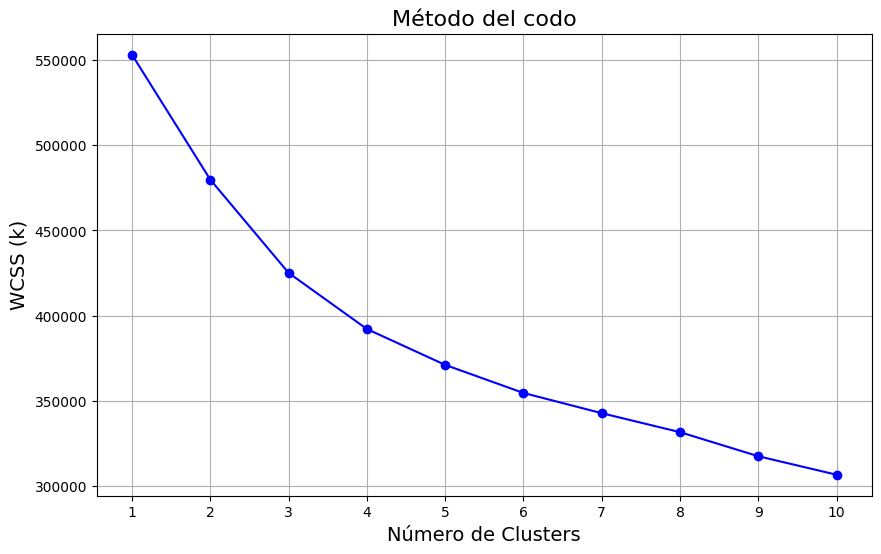

In [18]:
# Visualización del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title("Método del codo", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WCSS (k)", fontsize=14)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [19]:
# Aplicar K-Means al conjunto preparado (usando un número óptimo de clusters según el método del codo)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_prepared_sampled)

In [20]:
# Calcular la puntuación de silueta para cada muestra
silhouette_vals = silhouette_samples(X_prepared_sampled, y_kmeans)

In [21]:
# Calcular la puntuación media de silueta para todos los clusters
silhouette_avg = silhouette_score(X_prepared_sampled, y_kmeans)
print(f"Average Silhouette Score: {silhouette_avg:.3f}")

Average Silhouette Score: 0.151


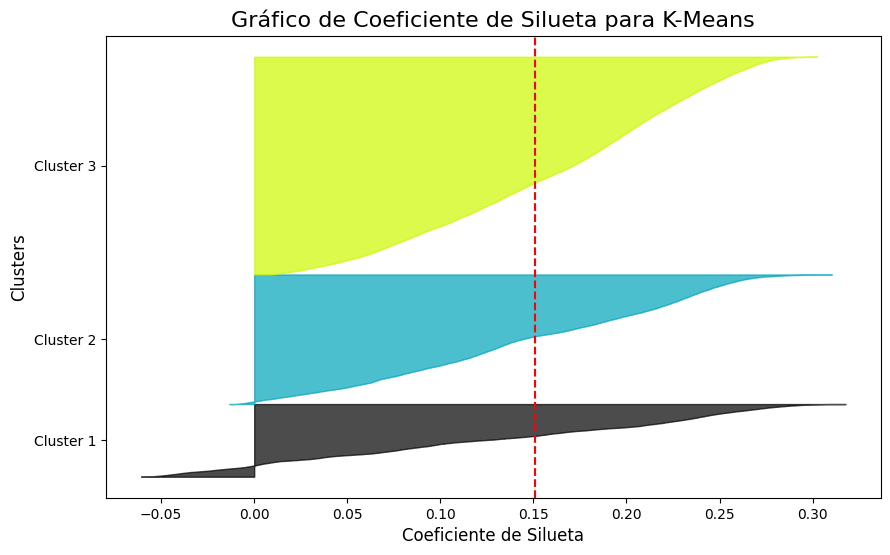

In [22]:
# Crear el gráfico de silueta
fig, ax = plt.subplots(figsize=(10, 6))
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    y_upper += len(ith_cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks(yticks)
ax.set_yticklabels([f"Cluster {i+1}" for i in range(n_clusters)])
ax.set_xlabel("Coeficiente de Silueta", fontsize=12)
ax.set_ylabel("Clusters", fontsize=12)
ax.set_title("Gráfico de Coeficiente de Silueta para K-Means", fontsize=16)
plt.show()

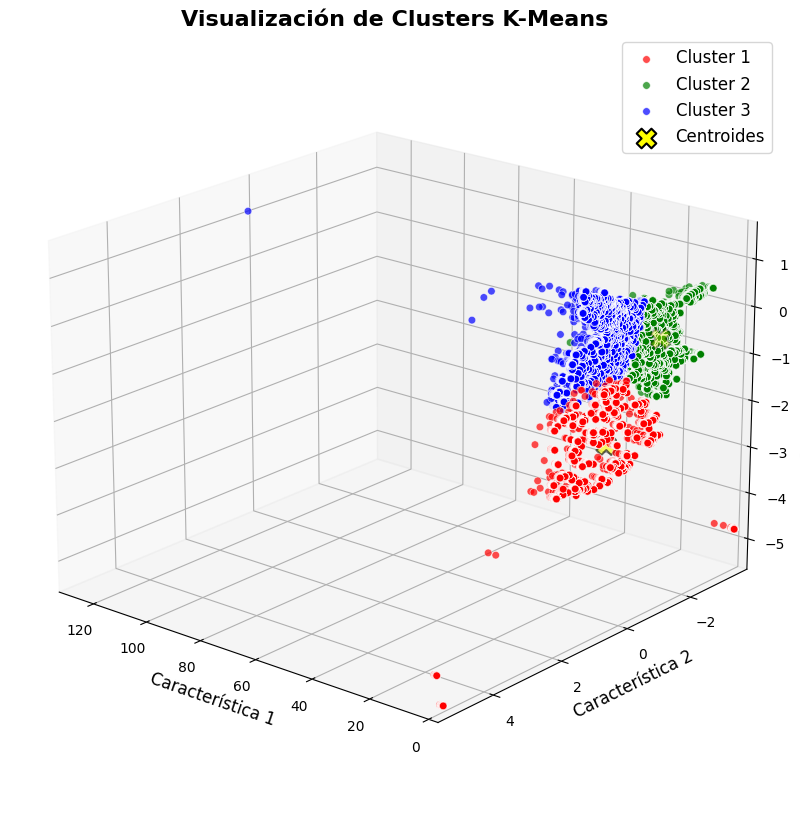

In [24]:
# Visualización 3D de los clusters
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Configurar colores y etiquetas para los clusters
colors = ['red', 'green', 'blue']
labels = [f'Cluster {i+1}' for i in range(3)]

# Graficar los puntos de cada cluster
for i, color, label in zip(range(3), colors, labels):
    ax.scatter(X_prepared_sampled[y_kmeans == i, 0], X_prepared_sampled[y_kmeans == i, 1], X_prepared_sampled[y_kmeans == i, 2], 
               s=30, c=color, label=label, alpha=0.7, edgecolors='w', linewidths=0.5)

# Graficar los centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=200, c='yellow', label="Centroides", marker='X', edgecolors='k', linewidths=1.5)

# Mejorar la estética del gráfico
ax.legend(loc='best', fontsize=12)
ax.set_title('Visualización de Clusters K-Means', fontsize=16, fontweight='bold')
ax.set_xlabel('Característica 1', fontsize=12)
ax.set_ylabel('Característica 2', fontsize=12)
ax.set_zlabel('Característica 3', fontsize=12)

# Ajustar los límites y el ángulo de vista
ax.set_xlim(X_prepared_sampled[:, 0].min(), X_prepared_sampled[:, 0].max())
ax.set_ylim(X_prepared_sampled[:, 1].min(), X_prepared_sampled[:, 1].max())
ax.set_zlim(X_prepared_sampled[:, 2].min(), X_prepared_sampled[:, 2].max())
ax.view_init(elev=20, azim=130)

# Mostrar el gráfico
plt.show()


 Análisis de los Clusters
Una vez que hayas identificado el número óptimo de clusters a partir del método del codo, el siguiente paso es interpretar y analizar las características de los clusters.

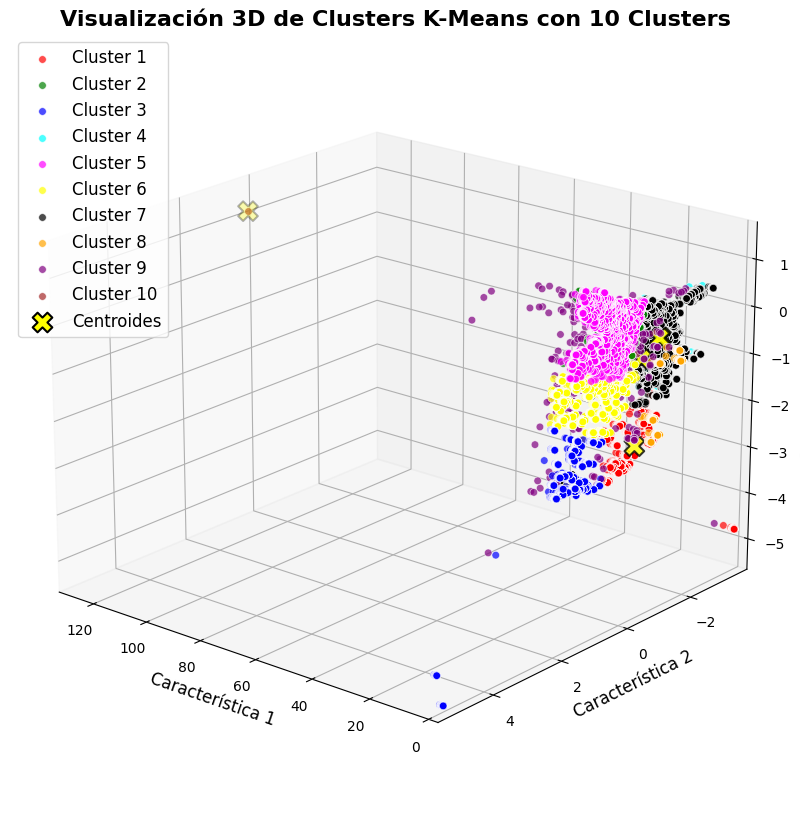

In [26]:
# Aplicar K-Means al conjunto preparado con 10 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_prepared_sampled)

# Crear una figura y un eje 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Configurar colores y etiquetas para los clusters
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
labels = [f'Cluster {i+1}' for i in range(n_clusters)] + ['Ruido']

# Graficar los puntos de cada cluster
for i, color, label in zip(range(n_clusters), colors, labels[:n_clusters]):
    ax.scatter(X_prepared_sampled[y_kmeans == i, 0], X_prepared_sampled[y_kmeans == i, 1], X_prepared_sampled[y_kmeans == i, 2], 
               s=30, c=color, label=label, alpha=0.7, edgecolors='w', linewidths=0.5)

# Opcional: si tienes una clase de "ruido", puedes graficarla de la siguiente manera
# Asumiendo que los puntos de ruido tienen el valor -1 en `y_kmeans`
noise = X_prepared_sampled[y_kmeans == -1]
if len(noise) > 0:
    ax.scatter(noise[:, 0], noise[:, 1], noise[:, 2], s=50, c='gray', label='Ruido', alpha=0.5, edgecolors='k', linewidths=0.5)

# Graficar los centroides
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=200, c='yellow', label="Centroides", marker='X', edgecolors='k', linewidths=1.5)

# Mejorar la estética del gráfico
ax.legend(loc='best', fontsize=12)
ax.set_title('Visualización 3D de Clusters K-Means con 10 Clusters', fontsize=16, fontweight='bold')
ax.set_xlabel('Característica 1', fontsize=12)
ax.set_ylabel('Característica 2', fontsize=12)
ax.set_zlabel('Característica 3', fontsize=12)

# Ajustar los límites y el ángulo de vista
ax.set_xlim(X_prepared_sampled[:, 0].min(), X_prepared_sampled[:, 0].max())
ax.set_ylim(X_prepared_sampled[:, 1].min(), X_prepared_sampled[:, 1].max())
ax.set_zlim(X_prepared_sampled[:, 2].min(), X_prepared_sampled[:, 2].max())
ax.view_init(elev=20, azim=130)

# Mostrar el gráfico
plt.show()




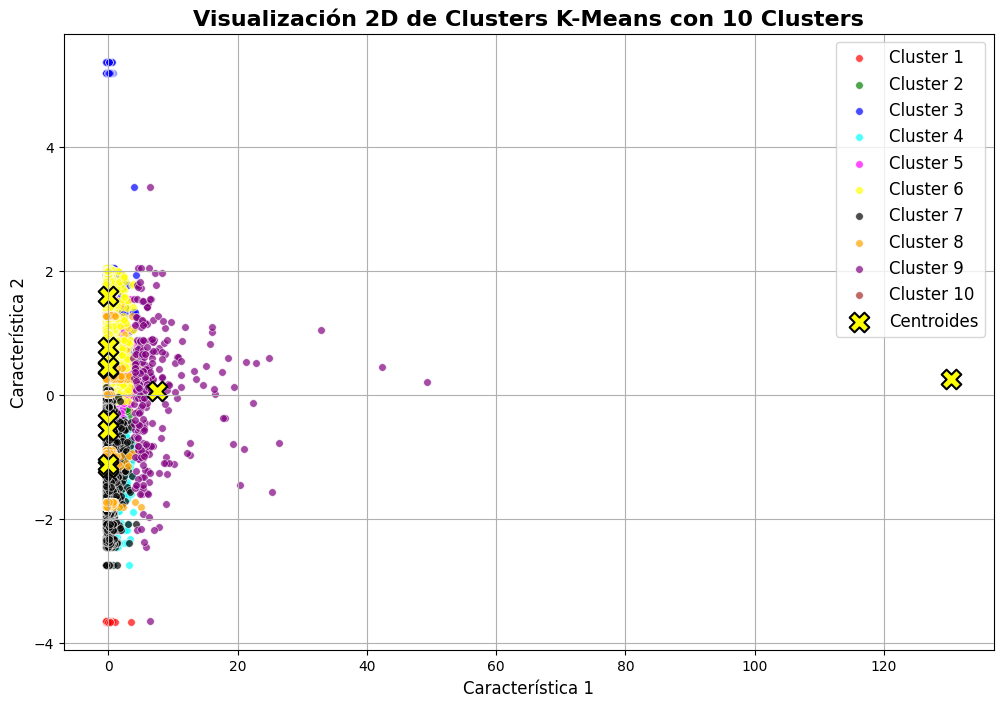

In [27]:


# Aplicar K-Means al conjunto preparado con 10 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_prepared_sampled)

# Visualización 2D de los clusters
plt.figure(figsize=(12, 8))

# Configurar colores y etiquetas para los clusters
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
labels = [f'Cluster {i+1}' for i in range(n_clusters)]

# Graficar los puntos de cada cluster
for i, color, label in zip(range(n_clusters), colors, labels):
    plt.scatter(X_prepared_sampled[y_kmeans == i, 0], X_prepared_sampled[y_kmeans == i, 1], 
                s=30, c=color, label=label, alpha=0.7, edgecolors='w', linewidths=0.5)

# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', label="Centroides", marker='X', edgecolors='k', linewidths=1.5)

# Mejorar la estética del gráfico
plt.legend(loc='best', fontsize=12)
plt.title('Visualización 2D de Clusters K-Means con 10 Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Característica 1', fontsize=12)
plt.ylabel('Característica 2', fontsize=12)
plt.grid(True)  # Añadir cuadrícula para facilitar la lectura

# Mostrar el gráfico
plt.show()


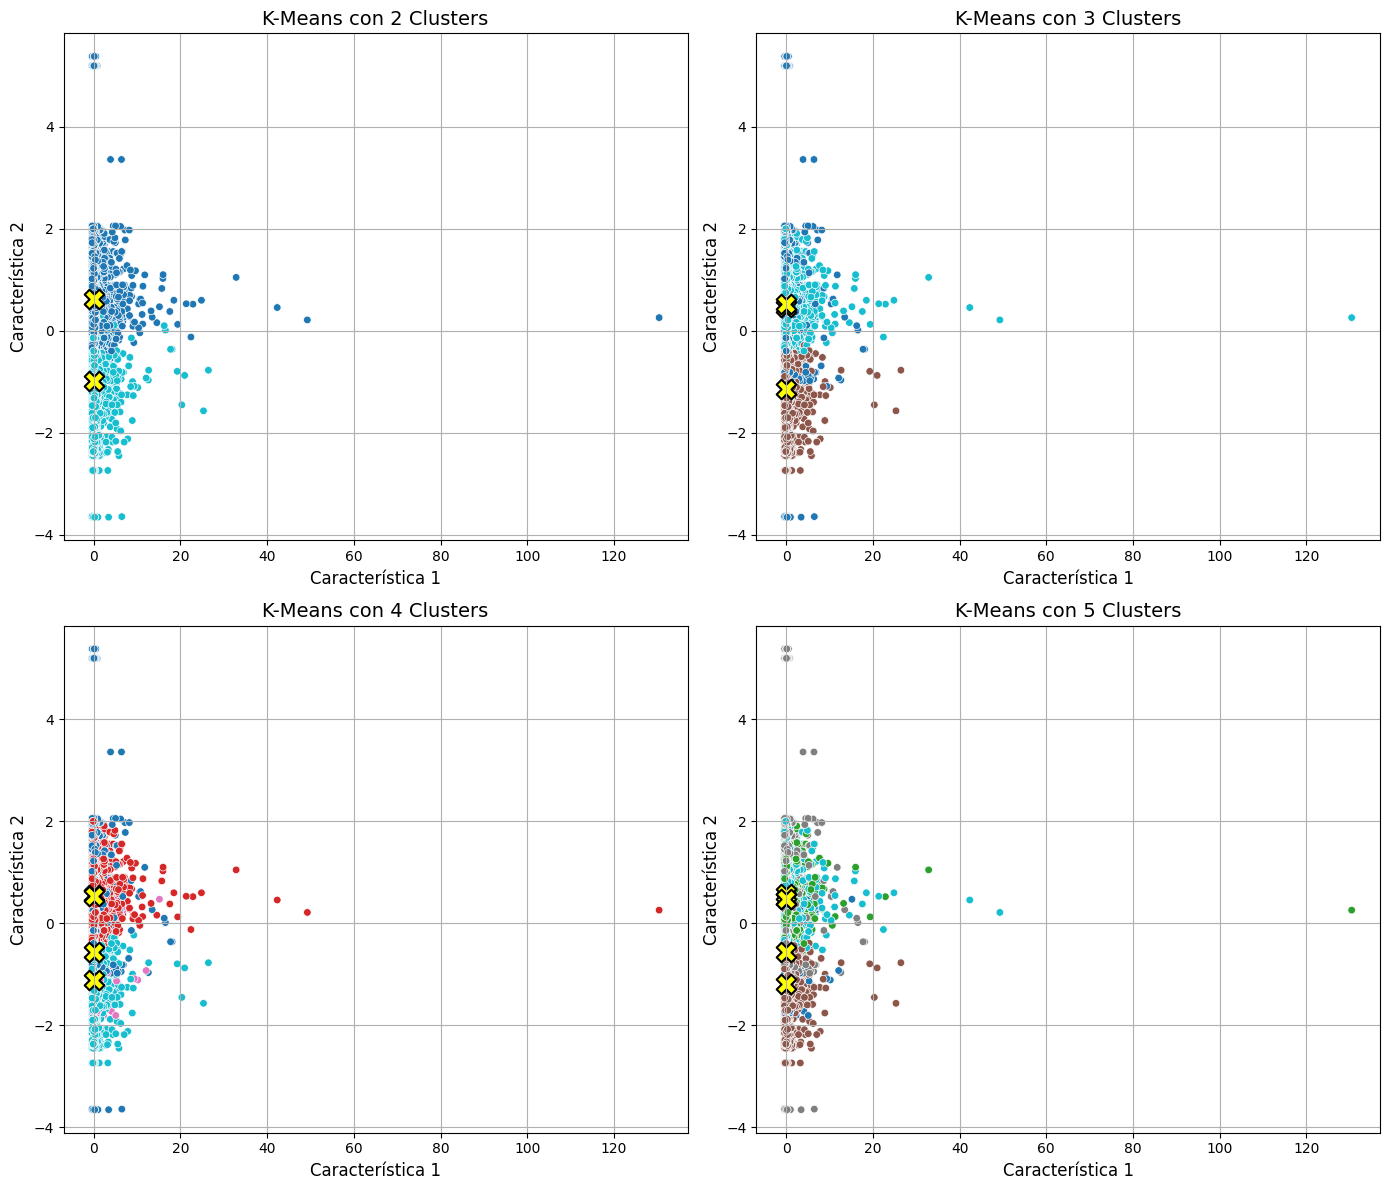

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir los diferentes valores de n_clusters
cluster_numbers = [2, 3, 4, 5]

# Configurar la figura con disposición 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Generar los gráficos para cada valor de n_clusters
for ax, n_clusters in zip(axs.flatten(), cluster_numbers):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X_prepared_sampled)
    
    colors = plt.cm.get_cmap('tab10', n_clusters)  # Obtener un colormap con un número adecuado de colores
    ax.scatter(X_prepared_sampled[:, 0], X_prepared_sampled[:, 1], 
               c=y_kmeans, s=30, cmap=colors, edgecolors='w', linewidths=0.5)
    
    # Graficar los centroides
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               s=200, c='yellow', label="Centroides", marker='X', edgecolors='k', linewidths=1.5)
    
    ax.set_title(f'K-Means con {n_clusters} Clusters', fontsize=14)
    ax.set_xlabel('Característica 1', fontsize=12)
    ax.set_ylabel('Característica 2', fontsize=12)
    ax.grid(True)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


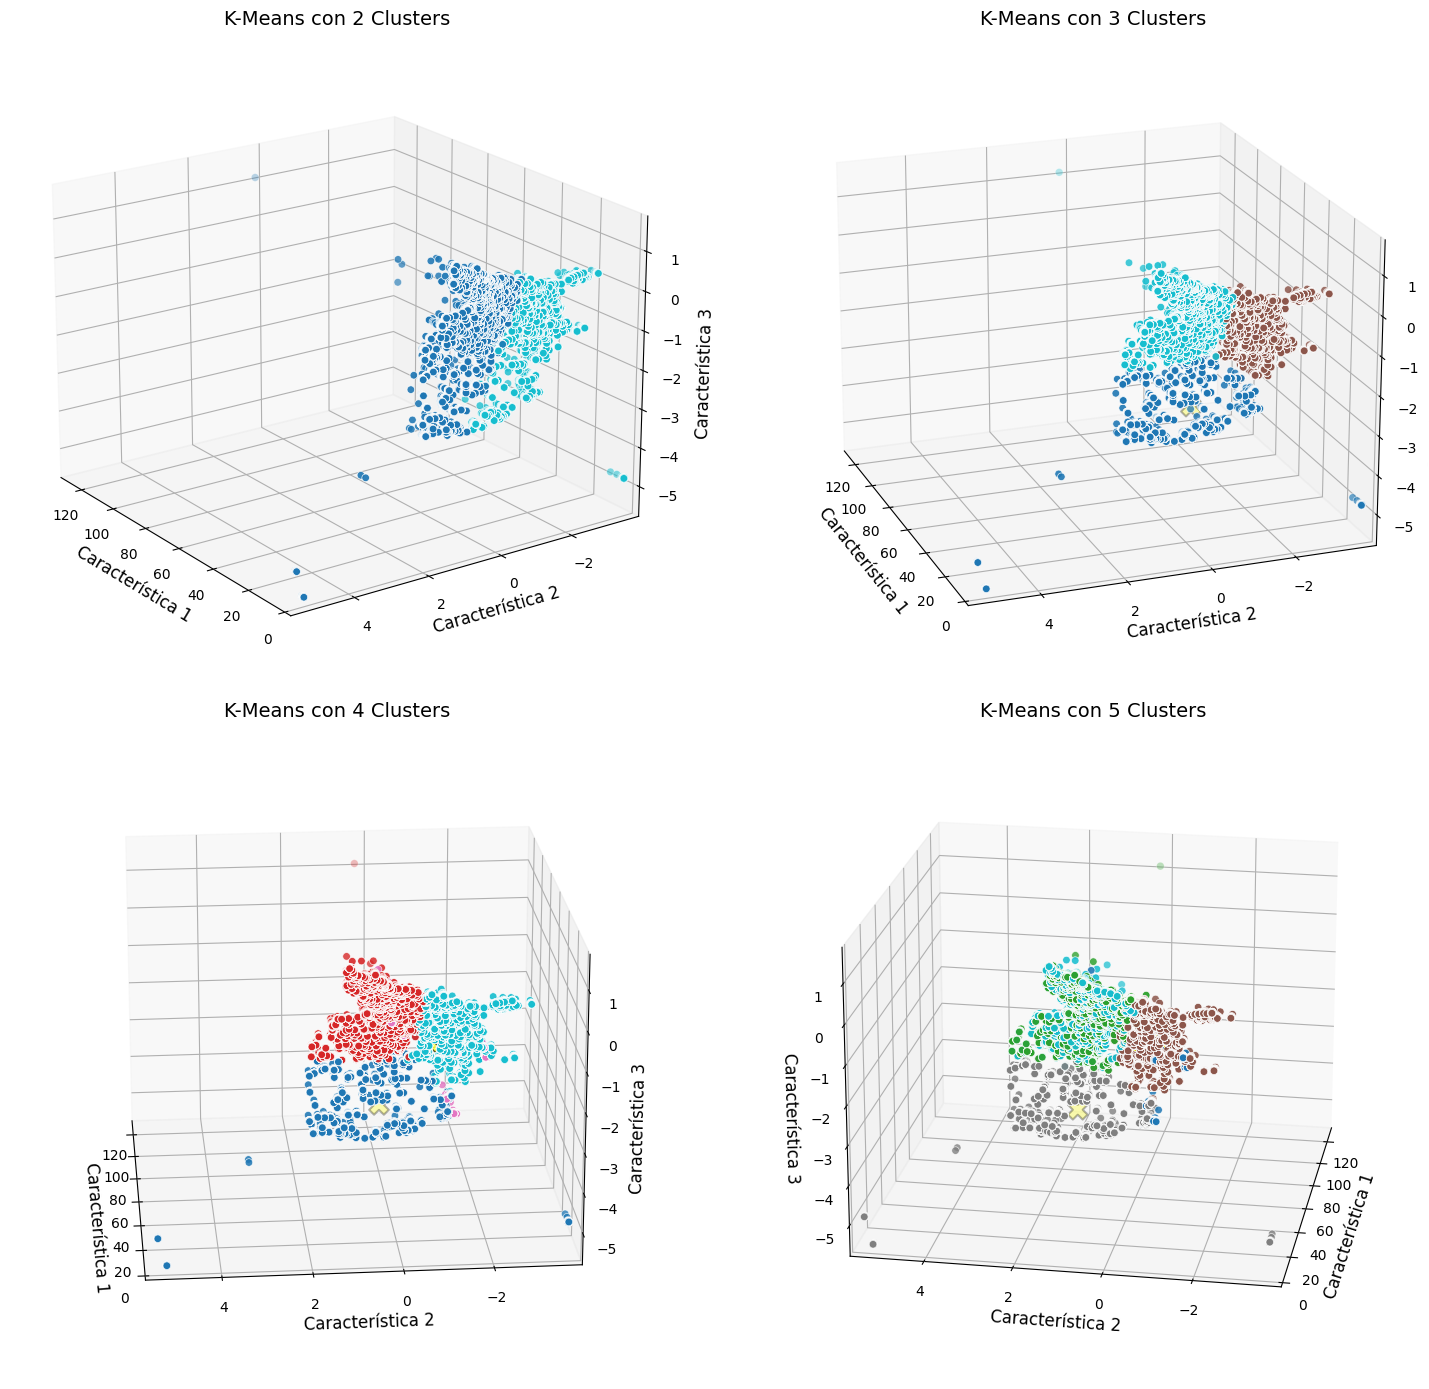

In [30]:


# Definir los diferentes valores de n_clusters
cluster_numbers = [2, 3, 4, 5]

# Configurar la figura con disposición 2x2
fig = plt.figure(figsize=(16, 14))

# Generar los gráficos para cada valor de n_clusters
for i, n_clusters in enumerate(cluster_numbers, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X_prepared_sampled)
    
    colors = plt.cm.get_cmap('tab10', n_clusters)  # Obtener un colormap con un número adecuado de colores
    ax.scatter(X_prepared_sampled[:, 0], X_prepared_sampled[:, 1], X_prepared_sampled[:, 2], 
               c=y_kmeans, s=30, cmap=colors, edgecolors='w', linewidths=0.5)
    
    # Graficar los centroides
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
               s=200, c='yellow', label="Centroides", marker='X', edgecolors='k', linewidths=1.5)

    # Ajustar los límites de los ejes para separar mejor los clusters
    padding = 0.1
    ax.set_xlim(X_prepared_sampled[:, 0].min() - padding, X_prepared_sampled[:, 0].max() + padding)
    ax.set_ylim(X_prepared_sampled[:, 1].min() - padding, X_prepared_sampled[:, 1].max() + padding)
    ax.set_zlim(X_prepared_sampled[:, 2].min() - padding, X_prepared_sampled[:, 2].max() + padding)
    
    # Ajustar la vista 3D
    ax.view_init(elev=20, azim=130 + i * 15)  # Cambiar ángulo para cada subplot

    ax.set_title(f'K-Means con {n_clusters} Clusters', fontsize=14)
    ax.set_xlabel('Característica 1', fontsize=12)
    ax.set_ylabel('Característica 2', fontsize=12)
    ax.set_zlabel('Característica 3', fontsize=12)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


C:\Users\bever\AppData\Local\Temp\ipykernel_18108\2176653801.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


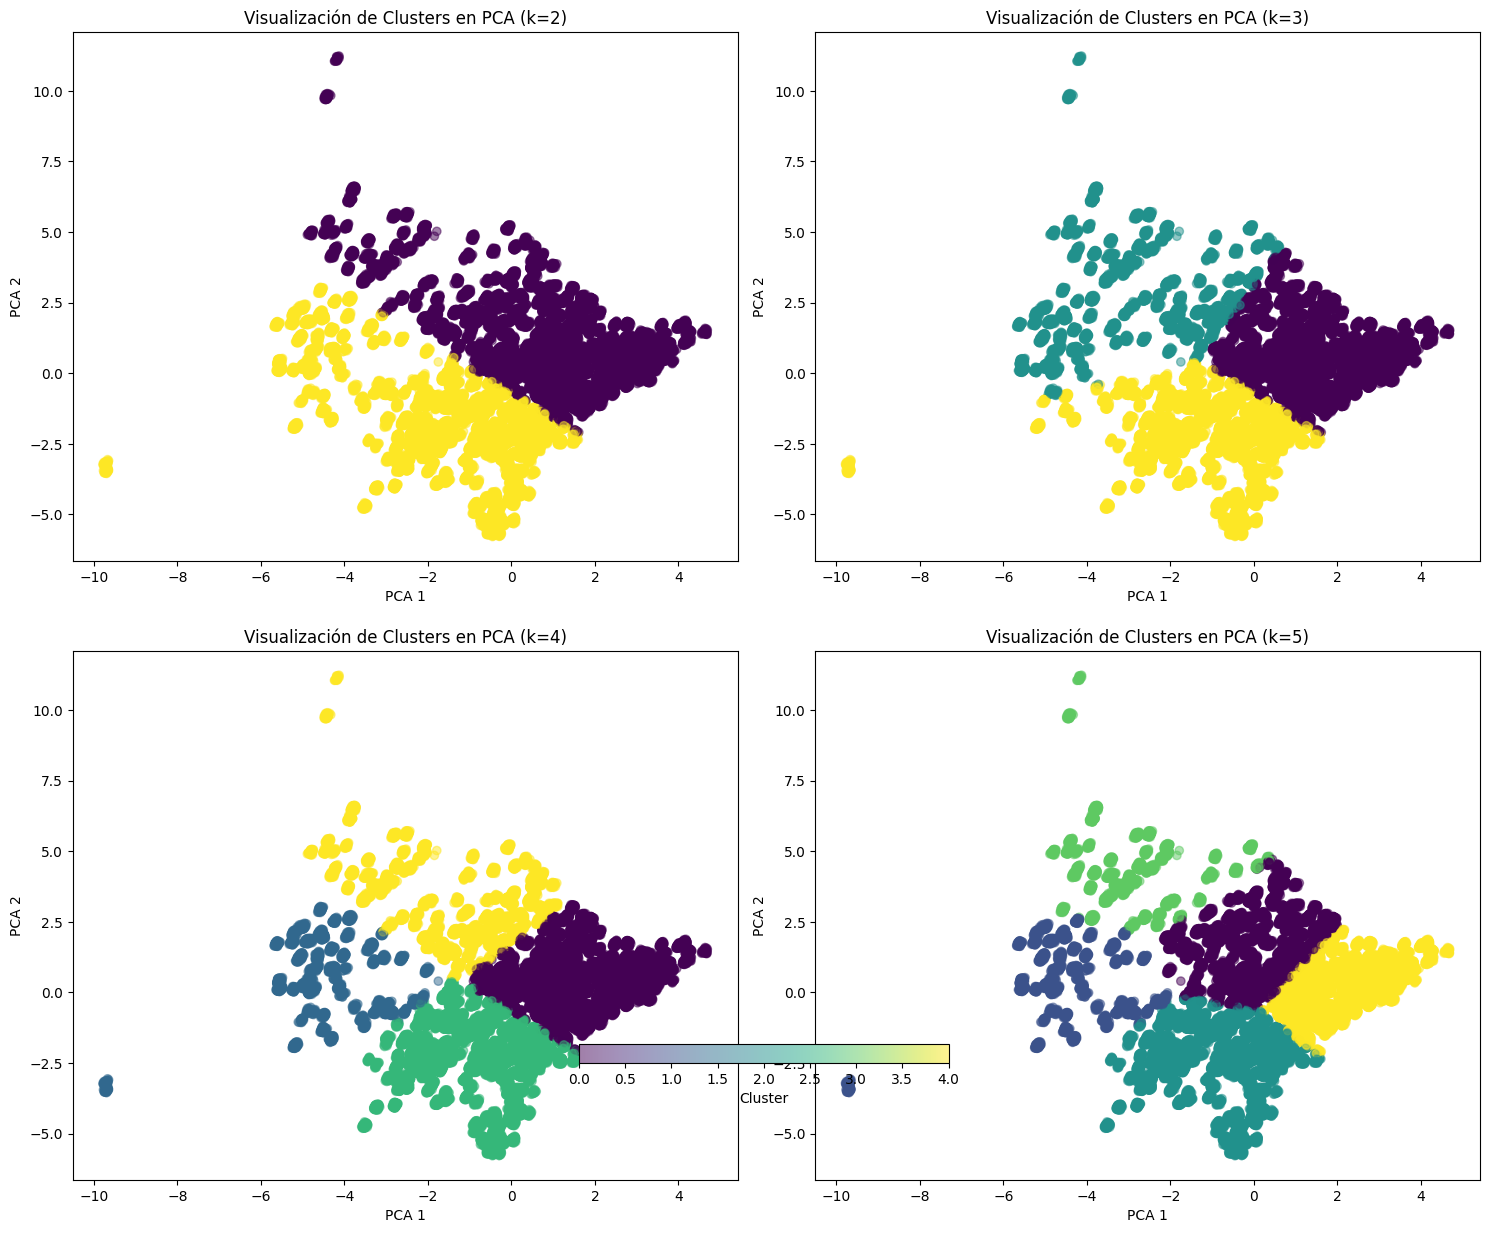

In [32]:
# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prepared_sampled)

# Aplicar PCA para reducir las dimensiones a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Crear una figura con subplots para diferentes valores de k
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Lista de números de clusters a probar
n_clusters_list = [2, 3, 4, 5]

for ax, n_clusters in zip(axes.flatten(), n_clusters_list):
    # Aplicar K-Means para cada número de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca)

    # Visualizar los clusters en el espacio PCA
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    ax.set_title(f'Visualización de Clusters en PCA (k={n_clusters})')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Añadir una leyenda y colorbar
fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.1, label='Cluster')
plt.tight_layout()
plt.show()
